In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


In [17]:
data= pd.read_csv('./dataset.txt')
print(data.shape)
data.head()

(768, 9)


,Number,Plasma,Diastolic,Triceps,serum,mass,pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


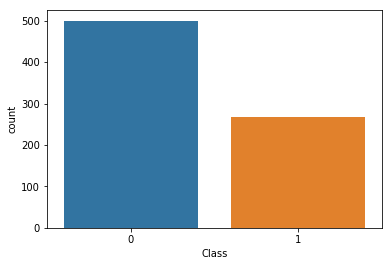

In [4]:
sns.countplot(data=data,x='Class')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


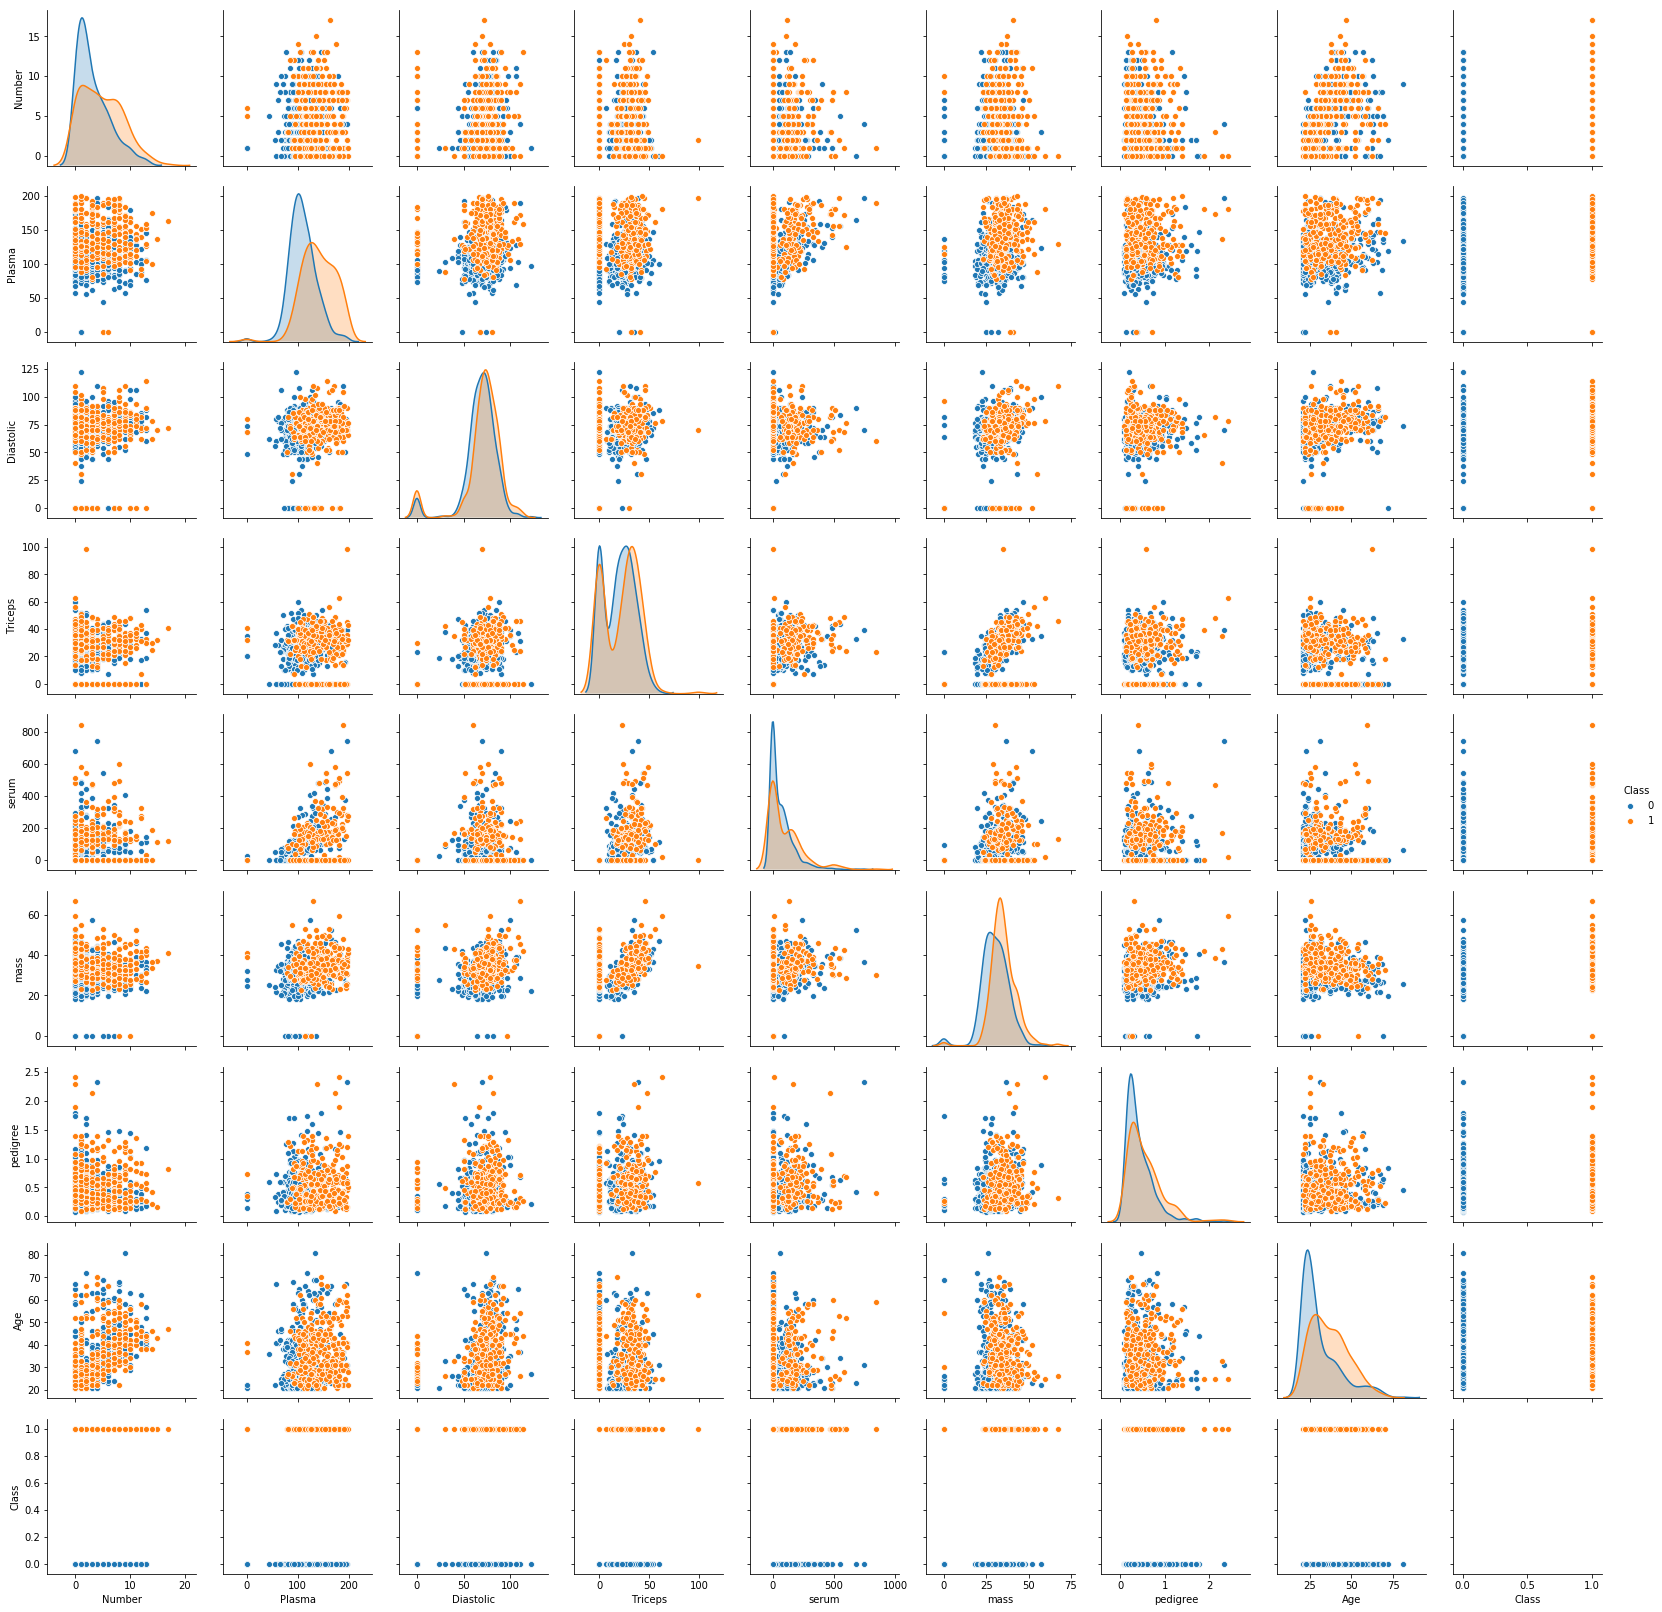

In [5]:
sns.pairplot(data=data,hue='Class')

In [18]:
X=data.drop(['Class'],axis=1)
y=data['Class']
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)

(460, 8)
(308, 8)


In [20]:
model= Sequential()
# 3 layer FC network 

In [21]:
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
diabets_model=model.fit(X_train, y_train, epochs=150, batch_size=10,validation_data=(X_test, y_test))

Train on 460 samples, validate on 308 samples
Epoch 1/150
460/460 [==============================] - 0s 255us/step - loss: 0.5096 - acc: 0.7739 - val_loss: 0.5956 - val_acc: 0.7143
Epoch 2/150
460/460 [==============================] - 0s 212us/step - loss: 0.4802 - acc: 0.7891 - val_loss: 0.6070 - val_acc: 0.7110
Epoch 3/150
460/460 [==============================] - 0s 232us/step - loss: 0.4828 - acc: 0.7804 - val_loss: 0.6402 - val_acc: 0.7013
Epoch 4/150
460/460 [==============================] - 0s 219us/step - loss: 0.4726 - acc: 0.7870 - val_loss: 0.6041 - val_acc: 0.7240
Epoch 5/150
460/460 [==============================] - 0s 210us/step - loss: 0.4821 - acc: 0.7848 - val_loss: 0.6063 - val_acc: 0.7143
Epoch 6/150
460/460 [==============================] - 0s 230us/step - loss: 0.4788 - acc: 0.7848 - val_loss: 0.5948 - val_acc: 0.7273
Epoch 7/150
460/460 [==============================] - 0s 211us/step - loss: 0.4814 - acc: 0.7826 - val_loss: 0.6786 - val_acc: 0.6753
Epoch 8/1

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [35]:
scores = model.evaluate(X_test, y_test)
print("Validation %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("Validation %s: %.2f%%" % (model.metrics_names[0], scores[0]*100))

scores = model.evaluate(X_train, y_train)
print("Training %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("Training %s: %.2f%%" % (model.metrics_names[0], scores[0]*100))

308/308 [==============================] - 0s 61us/step
Validation acc: 70.13%
Validation loss: 64.87%
460/460 [==============================] - 0s 56us/step
Training acc: 77.61%
Training loss: 48.24%


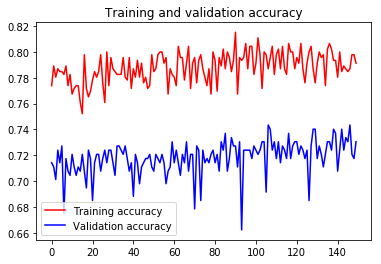

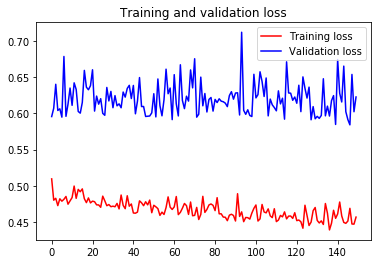

In [41]:
accuracy = diabets_model.history['acc']
val_accuracy = diabets_model.history['val_acc']
loss = diabets_model.history['loss']
val_loss = diabets_model.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()